# Data Science Research Methods - SussexBudgetProductions Report 

### CandNo: 284039

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import ttest_ind


In [2]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
# Create a dictionary for column renaming
column_mapping = {
    'color': 'film_color',
    'director_name': 'director_name',
    'num_critic_for_reviews': 'num_critic_reviews',
    'duration': 'film_duration_minutes',
    'director_facebook_likes': 'director_facebook_likes',
    'actor_3_facebook_likes': 'actor_3_facebook_likes',
    'actor_2_name': 'actor_2_name',
    'actor_1_facebook_likes': 'actor_1_facebook_likes',
    'gross': 'gross_revenue',
    'genres': 'film_genres',
    'actor_1_name': 'actor_1_name',
    'movie_title': 'film_title',
    'num_voted_users': 'num_voted_users',
    'cast_total_facebook_likes': 'total_cast_facebook_likes',
    'actor_3_name': 'actor_3_name',
    'facenumber_in_poster': 'face_number_in_poster',
    'plot_keywords': 'plot_keywords',
    'movie_imdb_link': 'imdb_link',
    'num_user_for_reviews': 'num_user_reviews',
    'language': 'film_language',
    'country': 'film_country',
    'content_rating': 'content_rating',
    'budget': 'film_budget',
    'title_year': 'release_year',
    'actor_2_facebook_likes': 'actor_2_facebook_likes',
    'imdb_score': 'imdb_score',
    'aspect_ratio': 'aspect_ratio',
    'movie_facebook_likes': 'movie_facebook_likes'
}

# Rename columns using the dictionary
df.rename(columns=column_mapping, inplace=True)

# Display the updated DataFrame with professional column names
df.head()


,film_color,director_name,num_critic_reviews,film_duration_minutes,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross_revenue,film_genres,...,num_user_reviews,film_language,film_country,content_rating,film_budget,release_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# color - based on year classify
 

In [4]:
# Sort DataFrame by release_year
sorted_df = df.sort_values(by='release_year')

# Find the first occurrence of 'Color'
color_transition_year = sorted_df.loc[sorted_df['film_color'] == 'Color', 'release_year'].min()

# Fill null values in film_color with 'Color' from the identified transition year
df['film_color'] = df.apply(lambda row: 'Color' if pd.isnull(row['film_color']) and row['release_year'] >= color_transition_year else row['film_color'], axis=1)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   film_color                 5039 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_reviews         4993 non-null   float64
 3   film_duration_minutes      5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross_revenue              4159 non-null   float64
 9   film_genres                5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  film_title                 5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  total_cast_facebook_likes  5043 non-null   int64

I have identified that a subset of rows contains null values in the 'director_name' column. Further analysis reveals that these rows also exhibit null values in other key columns, including 'gross,' 'budget,' and 'release_year.' I have decided to drop the rows where 'director_name' is null.

In [6]:
# Filter rows where director_name is null
null_director_rows = df[df['director_name'].isnull()]
null_director_rows

,film_color,director_name,num_critic_reviews,film_duration_minutes,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross_revenue,film_genres,...,num_user_reviews,film_language,film_country,content_rating,film_budget,release_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
177,Color,NaN,21.0,60.0,NaN,184.0,Philip Michael Thomas,982.0,NaN,Action|Crime|Drama|Mystery|Thriller,...,74.0,English,USA,TV-14,1500000.0,NaN,321.0,7.5,1.33,0
260,Color,NaN,29.0,60.0,NaN,432.0,Dirk Benedict,669.0,NaN,Action|Adventure|Crime,...,97.0,English,USA,TV-PG,NaN,NaN,554.0,7.6,4.00,0
404,Color,NaN,103.0,44.0,NaN,148.0,Scott Thompson,544.0,NaN,Crime|Drama|Horror|Mystery|Thriller,...,270.0,English,USA,TV-14,NaN,NaN,183.0,8.6,1.78,59000
459,NaN,NaN,95.0,54.0,NaN,0.0,Royce Johnson,577.0,NaN,Action|Adventure|Crime|Drama|Sci-Fi|Thriller,...,394.0,English,USA,TV-MA,NaN,NaN,4.0,8.8,16.00,55000
479,Black and White,NaN,31.0,25.0,NaN,474.0,Agnes Moorehead,1000.0,NaN,Comedy|Family|Fantasy,...,71.0,English,USA,TV-G,NaN,NaN,960.0,7.6,4.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,Color,NaN,75.0,60.0,NaN,833.0,Masi Oka,1000.0,NaN,Drama|Fantasy|Sci-Fi|Thriller,...,379.0,English,USA,TV-14,NaN,NaN,923.0,7.7,16.00,0
4803,Color,NaN,11.0,22.0,NaN,6.0,Ron Lynch,59.0,NaN,Animation|Comedy|Drama,...,82.0,English,USA,TV-PG,NaN,NaN,11.0,8.2,1.33,526
4819,Color,NaN,23.0,43.0,NaN,576.0,Tracy Spiridakos,2000.0,NaN,Action|Adventure|Drama|Sci-Fi,...,323.0,English,USA,TV-14,NaN,NaN,821.0,6.7,16.00,17000
4869,Color,NaN,11.0,58.0,NaN,250.0,James Norton,887.0,NaN,Crime|Drama,...,59.0,English,UK,TV-MA,NaN,NaN,340.0,8.5,16.00,10000


In [7]:
df=df.dropna(subset=['director_name'])

In addressing null values in the 'duration' column, we employed a genre-based approach, filling missing values with the mean duration for each genre. This strategy preserves data integrity while enhancing analytical accuracy.

In [8]:
# Calculate the mean duration for each genre
genre_mean_duration = df.groupby('film_genres')['film_duration_minutes'].mean()

# Fill null values in 'duration' with the mean duration for each genre
df['film_duration_minutes'] = df.apply(lambda row: genre_mean_duration[row['film_genres']] if pd.isnull(row['film_duration_minutes']) else row['film_duration_minutes'], axis=1)

# Verify the changes
df['film_duration_minutes'].isnull().sum()  # Check if there are still any null values in 'duration'


0

In [9]:
df['director_facebook_likes'].isnull().sum()

0

In [10]:
pd.options.display.max_columns = 100

To optimally address null values in actor facebook likes columns, we filled them by dividing total cast likes by 4, assuming it as the sum of director and actors for best accuracy.

In [11]:
# Check if total_cast_likes are present for records with null actor_facebook_likes
null_actor_likes = df[df['actor_3_facebook_likes'].isnull() | df['actor_2_facebook_likes'].isnull() | df['actor_1_facebook_likes'].isnull()]

# Fill null values in actor_facebook_likes by dividing total_cast_likes by 4
for actor_column in ['actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes']:
    df[actor_column] = df.apply(
        lambda row: row['total_cast_facebook_likes'] / 4 if pd.isnull(row[actor_column]) and row.name in null_actor_likes.index else row[actor_column],
        axis=1
    )

# Verify the changes
df[['actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes']].isnull().sum()


actor_3_facebook_likes    0
actor_2_facebook_likes    0
actor_1_facebook_likes    0
dtype: int64

In [12]:
# Fill null values in 'actor_1_name' and 'actor_3_name' with 'Unknown'
df['actor_1_name'].fillna('Unknown', inplace=True)
df['actor_2_name'].fillna('Unknown', inplace=True)
df['actor_3_name'].fillna('Unknown', inplace=True)

# Verify the changes
df[['actor_1_name', 'actor_2_name', 'actor_3_name']].isnull().sum()

actor_1_name    0
actor_2_name    0
actor_3_name    0
dtype: int64

In [13]:
mean_gross_same_director = df.groupby(['director_name'])['gross_revenue'].mean()

# Function to fill null values based on the mean gross of movies with the same director
def fill_gross_same_director(row):
    return mean_gross_same_director.get(row['director_name'], row['gross_revenue'])

# Fill null values in 'gross' based on the mean gross of movies with the same director
df['gross_revenue'] = df.apply(lambda row: fill_gross_same_director(row) if pd.isnull(row['gross_revenue']) else row['gross_revenue'], axis=1)


if both gross and budget is null, those records were having NAN's for director_name and many more important fields also. so thought it would be better to drop them as null data

In [14]:
# Drop rows where both 'gross' and 'budget' are null
df = df.dropna(subset=['gross_revenue', 'film_budget'], how='all')

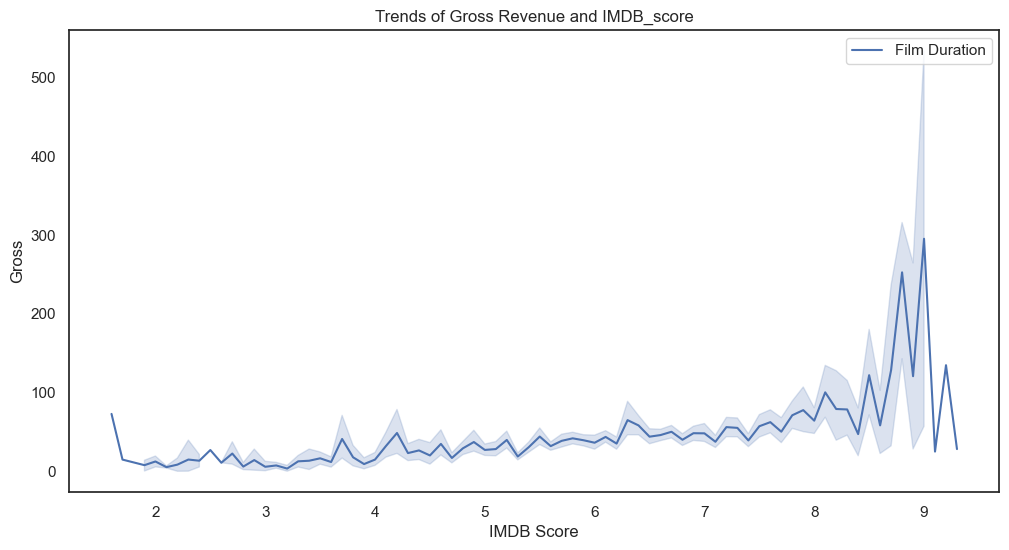

In [57]:
# Line plot to show trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='imdb_score', y='gross_revenue', data=df, label='Film Duration')
plt.title('Trends of Gross Revenue and IMDB_score')
plt.xlabel('IMDB Score')
plt.ylabel('Gross')
plt.yscale('linear')
plt.legend()
plt.show()


To address missing data in the "gross" and "budget" columns, a methodical strategy was implemented. The process involved calculating the percentage of net profit or loss corresponding to IMDb ratings. Leveraging this net profit information for specific IMDb ratings, accurate estimates for both budget and gross values were derived. 

In [16]:
# Define a function to fill null values based on the mean net result percentage
def fill_gross_on_net_result(row, column, group_column, mean_column, default_column):
    if pd.isnull(row[column]):
        group_value = row[group_column]    
        return row[default_column] * (1 + mean_column.get(group_value, 0) / 100)
    else:
        return row[column]
    
def fill_budget_on_net_result(row, column, group_column, mean_column, default_column):
    if pd.isnull(row[column]):
        group_value = row[group_column]    
        return row[default_column] / (1 + mean_column.get(group_value, 0) / 100)
    else:
        return row[column]

# Fill null values based on the mean net result percentage for IMDb rating groups
df['net_result_percent_imdb'] = (df['gross_revenue'] - df['film_budget']) / df['film_budget'] * 100
mean_net_result_percent_by_imdb = df.groupby('imdb_score')['net_result_percent_imdb'].mean()

df['gross_revenue'] = df.apply(
    lambda row: fill_gross_on_net_result(row, 'gross_revenue', 'imdb_score', mean_net_result_percent_by_imdb, 'film_budget'),
    axis=1
)

df['film_budget'] = df.apply(
    lambda row: fill_budget_on_net_result(row, 'film_budget', 'imdb_score', mean_net_result_percent_by_imdb, 'gross_revenue'),
    axis=1
)

# Drop intermediate column
df.drop(columns=['net_result_percent_imdb'], inplace=True)

# Verify the changes
null_gross_count = df['gross_revenue'].isnull().sum()
null_budget_count = df['film_budget'].isnull().sum()

null_gross_count, null_budget_count


(3, 0)

so if the imdb values are also unique then we cannot calculate net profit for same IMDB rating. so for remaining 3 null records in gross we fill with mean of nearby imdb score 

In [17]:
df['gross_revenue'] = df.groupby(round(df['imdb_score']))['gross_revenue'].transform(lambda x: x.fillna(x.mean()))

Fill null values in face_number_in_poster

In [18]:
mean_value = round(df['face_number_in_poster'].mean(skipna=True))

# Fill null values with the rounded mean
df['face_number_in_poster'].fillna(mean_value, inplace=True)

Fill the null values in aspect_ratio column by grouping release_year and getting mode of that year

In [19]:
df['aspect_ratio'] = df.groupby('release_year')['aspect_ratio'].transform(lambda x: x.fillna(x.mode().iat[0]))


In [20]:
# Split the 'film_genres' column into multiple binary columns using one-hot encoding
genres_df = df['film_genres'].str.get_dummies(sep='|')
genres_df = genres_df.add_prefix('genre_')
# Concatenate the genres_df with your original DataFrame
df = pd.concat([df, genres_df], axis=1)

In [21]:
df['num_critic_reviews'] = df.groupby('imdb_score')['num_critic_reviews'].transform(lambda x: x.fillna(x.mean()))


In [22]:
df[df.isnull().any(axis=1)]

,film_color,director_name,num_critic_reviews,film_duration_minutes,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross_revenue,film_genres,actor_1_name,film_title,num_voted_users,total_cast_facebook_likes,actor_3_name,face_number_in_poster,plot_keywords,imdb_link,num_user_reviews,film_language,film_country,content_rating,film_budget,release_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Film-Noir,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_News,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Thriller,genre_War,genre_Western
242,Color,Frédéric Forestier,33.0,116.0,0.0,141.0,Santiago Segura,936.0,1.172440e+08,Adventure|Comedy|Family|Fantasy,Alain Delon,Asterix at the Olympic Games,20567,1609,Vanessa Hessler,1.0,1st century b.c.|lightsaber|local blockbuster|...,http://www.imdb.com/title/tt0463872/?ref_=fn_t...,36.0,French,France,NaN,7.800000e+07,2008.0,276.0,5.1,2.35,291,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
367,Color,Timur Bekmambetov,1.0,141.0,335.0,635.0,Ayelet Zurer,11000.0,5.785744e+07,Adventure|Drama|History,Morgan Freeman,Ben-Hur,57,13379,Moises Arias,2.0,NaN,http://www.imdb.com/title/tt2638144/?ref_=fn_t...,1.0,English,USA,PG-13,2.398650e+07,2016.0,745.0,6.1,2.35,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
507,Color,Andrés Couturier,3.0,89.0,0.0,20.0,David Hoffman,163.0,1.138973e+07,Animation|Family,Sariann Monaco,Top Cat Begins,230,370,Ben Diskin,0.0,NaN,http://www.imdb.com/title/tt4057916/?ref_=fn_t...,1.0,Spanish,Mexico,PG,8.000000e+06,2015.0,94.0,4.4,2.35,138,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
810,Color,Pou-Soi Cheang,14.0,119.0,3.0,22.0,Aaron Kwok,879.0,7.469717e+07,Action|Adventure|Fantasy,Li Gong,Xi you ji zhi: Sun Wukong san da Baigu Jing,1212,1026,Eddie Peng,1.0,buddhism|demon|journey to the west|monk|monkey...,http://www.imdb.com/title/tt4591310/?ref_=fn_t...,9.0,English,China,NaN,6.800500e+07,2016.0,107.0,6.0,2.35,426,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1044,Color,Chuck Bowman,32.0,89.0,42.0,235.0,Lochlyn Munro,598.0,3.053471e+06,Horror|Thriller,P.J. Soles,The Tooth Fairy,1263,2353,Steve Bacic,0.0,bare breasts|genital dismemberment|mulching so...,http://www.imdb.com/title/tt0473553/?ref_=fn_t...,32.0,English,USA,NaN,1.500000e+06,2006.0,555.0,4.6,1.78,352,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5028,Black and White,Ivan Kavanagh,12.0,83.0,18.0,0.0,Michael Parle,10.0,2.648002e+04,Horror,Patrick O'Donnell,Tin Can Man,57,15,Emma Eliza Regan,0.0,NaN,http://www.imdb.com/title/tt1235811/?ref_=fn_t...,1.0,English,Ireland,NaN,1.000000e+04,2007.0,5.0,6.7,1.33,105,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5029,Color,Kiyoshi Kurosawa,78.0,111.0,62.0,6.0,Anna Nakagawa,89.0,9.459600e+04,Crime|Horror|Mystery|Thriller,Kôji Yakusho,The Cure,6318,115,Denden,0.0,breasts|interrogation|investigation|murder|wat...,http://www.imdb.com/title/tt0123948/?ref_=fn_t...,50.0,Japanese,Japan,NaN,1.000000e+06,1997.0,13.0,7.4,1.85,817,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
5031,Color,Thomas L. Phillips,13.0,82.0,120.0,84.0,Joe Coffey,785.0,2.960382e+05,Comedy|Horror|Thriller,Julianna Pitt,Sanctuary; Quite a Conundrum,133,1111,John Lucas,1.0,nudity|party|pirate|swimsuit|three word title,http://www.imdb.com/title/tt2049518/?ref_=fn_t...,8.0,English,USA,NaN,2.000000e+05,2012.0,98.0,5.4,16.00,424,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,7.192203e+04,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt210

In [23]:
df['plot_keywords'] = df['plot_keywords'].fillna(df['film_genres'])

In [24]:
df['num_user_reviews'] = df.groupby('imdb_score')['num_user_reviews'].transform(lambda x: x.fillna(x.mean()))

In [25]:
def fillna_most_frequent(group):
    if not group.empty and not group.mode().empty:
        return group.fillna(group.mode().iloc[0])
    else:
        return group

# Fill null values in 'film_country' based on the most frequent country within each 'film_genres' group
df['film_country'] = df.groupby('film_genres')['film_country'].transform(fillna_most_frequent)


In [26]:
def fillna_most_frequent(group):
    if not group.empty and not group.mode().empty:
        return group.fillna(group.mode().iloc[0])
    else:
        return group

# Fill null values in 'film_language' based on the most frequent language within each 'film_country' group
df['film_language'] = df.groupby('film_country')['film_language'].transform(fillna_most_frequent)

In [27]:
# Fill null values in 'release_year' with the mean release year based on the director
mean_release_year_by_director = df.groupby('director_name')['release_year'].mean()
df['release_year'] = df.apply(lambda row: mean_release_year_by_director[row['director_name']] if pd.isnull(row['release_year']) else row['release_year'], axis=1)

In [28]:
def fillna_mode(group):
    if not group.empty and not group.mode().empty:
        return group.fillna(group.mode().iloc[0])
    else:
        return group

# Fill null values in 'content_rating' based on mode within each 'film_country' group
df['content_rating'] = df.groupby('film_genres')['content_rating'].transform(fillna_mode)
df['content_rating'] = df.groupby('film_language')['content_rating'].transform(fillna_most_frequent)
df['content_rating'] = df.groupby('film_country')['content_rating'].transform(fillna_most_frequent)


In [29]:
df.isnull().sum()

film_color                   0
director_name                0
num_critic_reviews           0
film_duration_minutes        0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross_revenue                0
film_genres                  0
actor_1_name                 0
film_title                   0
num_voted_users              0
total_cast_facebook_likes    0
actor_3_name                 0
face_number_in_poster        0
plot_keywords                0
imdb_link                    0
num_user_reviews             0
film_language                0
film_country                 0
content_rating               0
film_budget                  0
release_year                 0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 1
movie_facebook_likes         0
genre_Action                 0
genre_Adventure              0
genre_Animation              0
genre_Biography              0
genre_Co

In [30]:
df['genre_sum'] = df['genre_Action']+df['genre_Adventure']+df['genre_Animation'] + \
                  df['genre_Biography'] + df['genre_Comedy'] + \
                  df['genre_Crime'] + df['genre_Documentary'] + df['genre_Drama'] + \
                  df['genre_Family'] + df['genre_Fantasy'] + df['genre_Film-Noir'] + \
                  df['genre_History'] + df['genre_Horror'] + df['genre_Music'] + \
                  df['genre_Musical'] + df['genre_Mystery'] + df['genre_News'] + \
                  df['genre_Romance'] + df['genre_Sci-Fi'] + df['genre_Short'] + \
                  df['genre_Sport'] + df['genre_Thriller'] + df['genre_War'] + \
                  df['genre_Western']

converting gross and budget in millions to get more readability of data

In [31]:
df['film_budget'] = df['film_budget'] / 1000000
df['gross_revenue'] = df['gross_revenue'] / 1000000

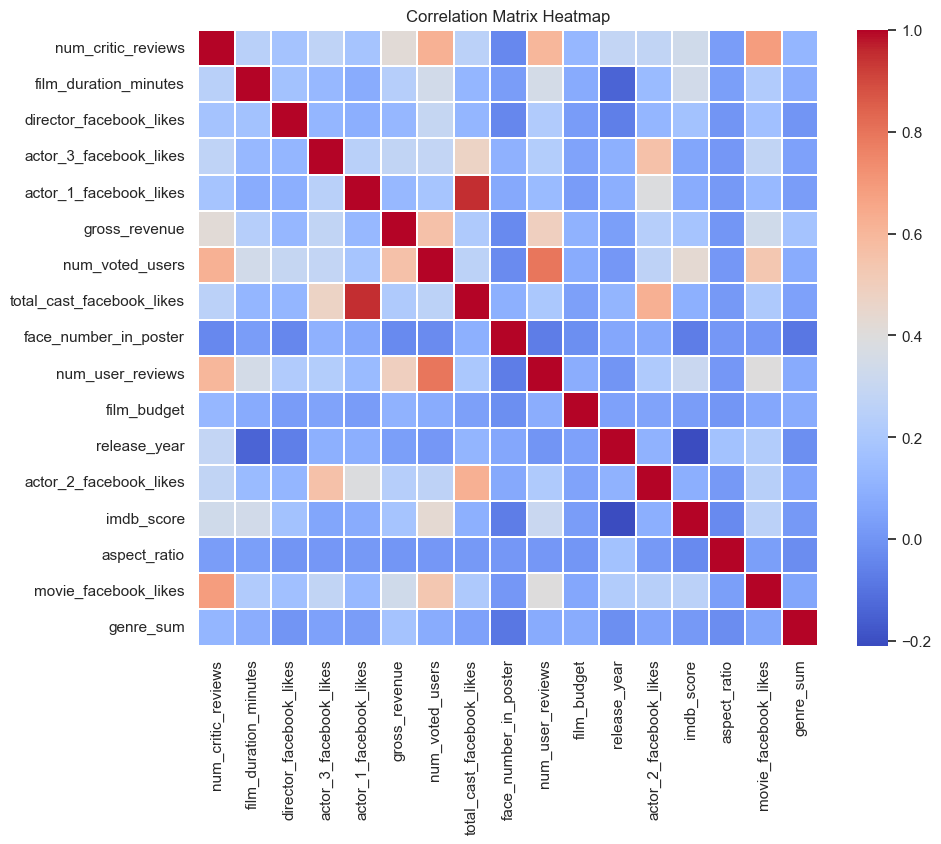

In [32]:
# Calculate the correlation matrix
continuous_columns = ['num_critic_reviews', 'film_duration_minutes',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross_revenue', 'num_voted_users',
       'total_cast_facebook_likes', 'face_number_in_poster',
       'num_user_reviews', 'film_budget', 'release_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'genre_sum']

corr_matrix = df[continuous_columns].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.set(style="white")  # Optional: Set the style of the heatmap

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.title('Correlation Matrix Heatmap')
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f",  linewidths=.1)
plt.show()

## Hypothesis 1: Analysis of total cast facebook likes Impact on Mean Gross Revenue in Movies 

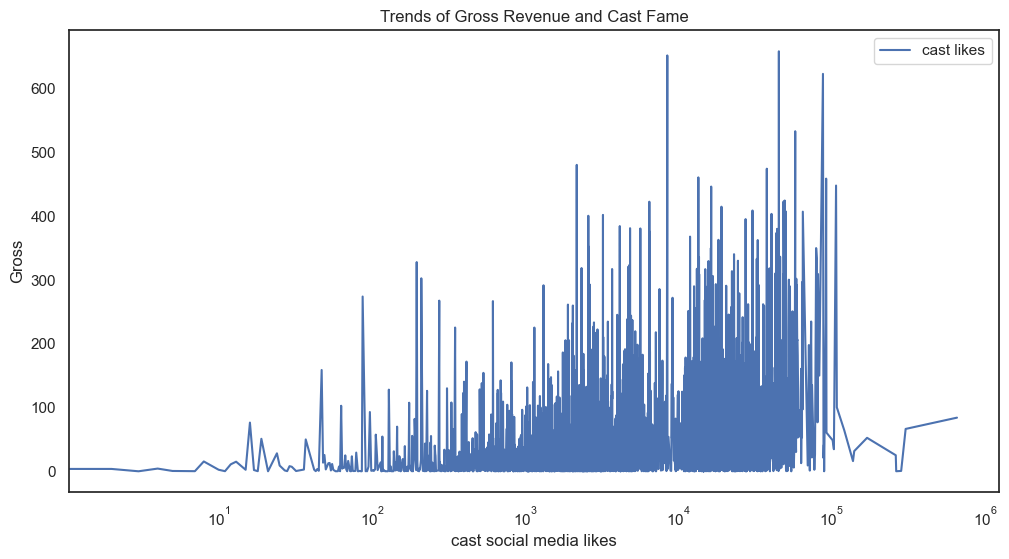

In [33]:
# Assuming df is your DataFrame with 'gross_revenue', 'total_cast_facebook_likes'columns
# Line plot to show trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='total_cast_facebook_likes', y='gross_revenue', data=df, label='cast likes', errorbar=None)
plt.title('Trends of Gross Revenue and Cast Fame')
plt.xlabel('cast social media likes')
plt.ylabel('Gross')
plt.yscale('linear')
plt.xscale('log')
plt.legend()
plt.show()


In [34]:
# Perform Independent Samples T-Test
t_stat, p_value = stats.ttest_ind(df['total_cast_facebook_likes'], df['gross_revenue'], equal_var=False)

# Print results
print("Independent Samples T-Test:")
print("T-Statistic:", t_stat)
print("P-Value:", round(p_value,3))

# Interpret the results
alpha = 0.05

# Null hypothesis
if p_value < alpha:
    print("\nReject the null hypothesis.")
    print("There is a significant effect of total cast likes on gross revenue.")
else:
    print("\nFail to reject the null hypothesis.")
    print("There is no significant effect of total cast likes on gross revenue.")


Independent Samples T-Test:
T-Statistic: 37.51061748328204
P-Value: 0.0

Reject the null hypothesis.
There is a significant effect of total cast likes on gross revenue.


The rejection of the null hypothesis supports the idea that higher total cast Facebook likes are linked to a substantial increase in gross revenue for movies.

In [35]:
#set the maximum possible budget to 1.5
max_budget = 1.5
topgenreseries=df.groupby('total_cast_facebook_likes')[['imdb_score','total_cast_facebook_likes','film_budget','gross_revenue']].mean()
#find the details of films with less than the maximum budget
budget_genres = topgenreseries[topgenreseries['film_budget']<max_budget]
budget_genres = budget_genres.sort_values(by=['imdb_score'],ascending=False)
budget_genres.head()

,imdb_score,total_cast_facebook_likes,film_budget,gross_revenue
total_cast_facebook_likes,,,,
16089,8.9,16089.0,1.20,6.100000
1433,8.9,1433.0,0.35,17.078655
3442,8.6,3442.0,0.95,2.168747
100,8.5,100.0,0.18,0.925402
28994,8.4,28994.0,1.20,2.812029


In [36]:
average_top5_likes = budget_genres['total_cast_facebook_likes'].head(5).mean()
average_top5_likes

10011.6

Exploring films with a budget under 1.5, we identified a trend: films with total cast Facebook likes near the average of the top three enjoyed notable revenue. This suggests a correlation between a well-received cast, as gauged by likes, and financial success. This correlation underscores the potential financial impact of strategic casting decisions and promotional efforts.
so we suggest that an average of around 10011 would recieve the gross.

## Hypothesis 2: Analysis of number of genres Impact on Mean Gross Revenue in Movies 

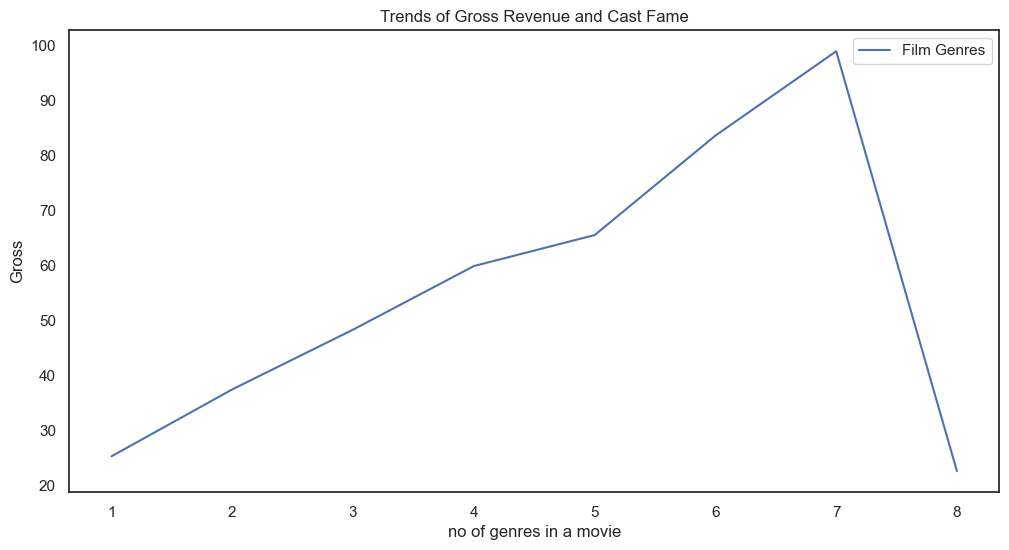

In [37]:
# Line plot to show trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='genre_sum', y='gross_revenue', data=df, label='Film Genres', errorbar=None)
plt.title('Trends of Gross Revenue and Cast Fame')
plt.xlabel('no of genres in a movie')
plt.ylabel('Gross')
plt.yscale('linear')
plt.legend()
plt.show()


In [38]:
#set the maximum possible budget to 1.5
max_budget = 1.5
budget_genres = df[df['film_budget']<max_budget]
topgenreseries=budget_genres.groupby('genre_sum')[['imdb_score','film_budget','gross_revenue']].mean()
#find the details of films with less than the maximum budget
topgenreseries = topgenreseries.sort_values(by=['imdb_score'],ascending=False)
topgenreseries

,imdb_score,film_budget,gross_revenue
genre_sum,,,
3,6.687222,0.512078,5.322843
4,6.532787,0.582328,4.320650
6,6.525000,0.264376,2.640797
2,6.489202,0.484284,5.648063
1,6.364088,0.467031,5.435679
5,5.961538,0.336023,3.017332


In delving into films with a budget below 1.5, our analysis brought to light three distinct genres that captured our attention. Within this budgetary constraint, these films boasted an impressive average IMDb score of 6.68, signaling a positive reception from audiences. Based on the results it is better to go with the genre count of 3


## Hypothesis 3: Analysis of total facebook likes for actors Impact on Mean Gross Revenue 

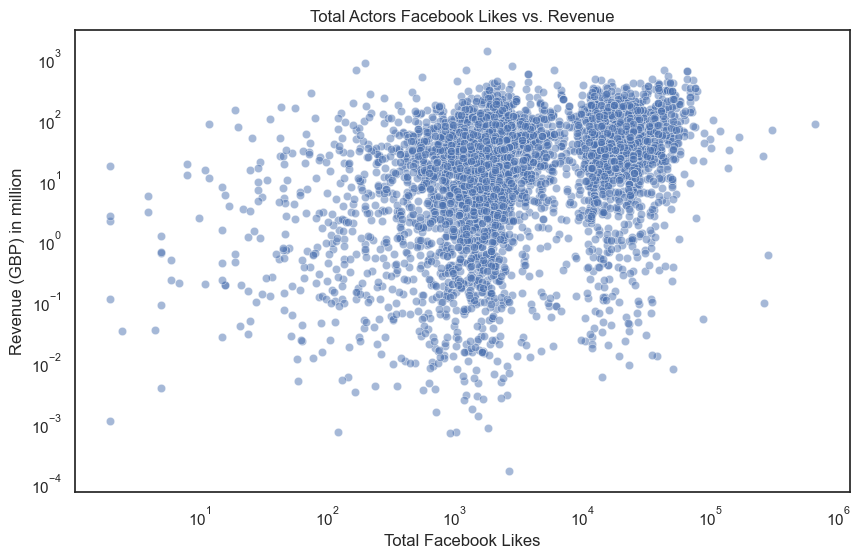

T-test Results - p-value: 9.653484948174355e-51
Reject the null hypothesis. There is a significant difference in revenue between movies with well-liked actors and those without.


In [39]:
#Create a new metric representing the total Facebook likes for the top three actors
df['total_facebook_likes'] = df[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].sum(axis=1)

# Visualize the impact of total Facebook likes on revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_facebook_likes', y='gross_revenue', data=df, alpha=0.5)
plt.title('Total Actors Facebook Likes vs. Revenue')
plt.xlabel('Total Facebook Likes')
plt.ylabel('Revenue (GBP) in million')
plt.yscale('log')
plt.xscale('log')
plt.show()

# Perform a hypothesis test to test the hypothesis
high_likes = df[df['total_facebook_likes'] > df['total_facebook_likes'].median()]['gross_revenue']
low_likes = df[df['total_facebook_likes'] <= df['total_facebook_likes'].median()]['gross_revenue']

statistic_likes, p_value_likes = ttest_ind(high_likes, low_likes)
print(f"T-test Results - p-value: {p_value_likes}")

# Interpretation
alpha = 0.05

if p_value_likes <= alpha:
    print("Reject the null hypothesis. There is a significant difference in revenue between movies with well-liked actors and those without.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in revenue between movies with well-liked actors and those without.")


In [40]:
#set the maximum possible budget to 1.5
max_budget = 1.5
top_actors=df.groupby('total_facebook_likes')[['imdb_score','total_facebook_likes','film_budget','gross_revenue']].mean()
#find the details of films with less than the maximum budget
budget_actors = top_actors[top_actors['film_budget']<max_budget]
budget_actors = budget_actors.sort_values(by=['imdb_score'],ascending=False)
budget_actors.head()

,imdb_score,total_facebook_likes,film_budget,gross_revenue
total_facebook_likes,,,,
16058.0,8.9,16058.0,1.20,6.100000
102.0,8.4,102.0,0.15,0.428475
28455.0,8.4,28455.0,1.20,2.812029
2118.0,8.4,2118.0,0.50,7.098492
103.0,8.3,103.0,0.07,0.620885


In [41]:
average_top5_likes = budget_actors['total_facebook_likes'].head(5).mean()
average_top5_likes

9367.2

when the cumulative likes of key actors approach the 10,000 mark, it correlates with promising revenue outcomes.

## Hypothesis 4: Analysis of consent_rating Impact on Mean Gross Revenue in Movies 

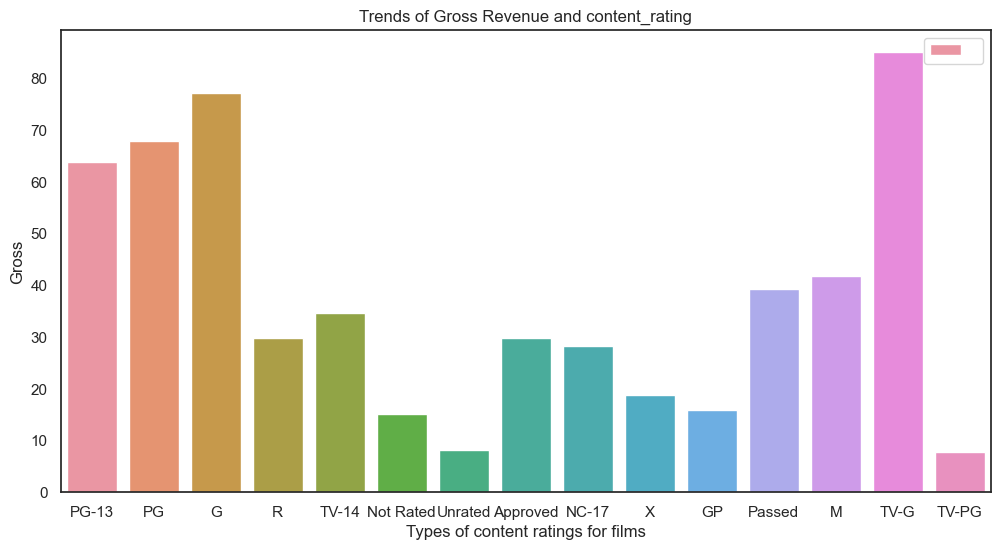

In [42]:
# Line plot to show trends over time
plt.figure(figsize=(12, 6))
sns.barplot(x='content_rating', y='gross_revenue', data=df,  label=' ', estimator='mean', errorbar=None)
plt.title('Trends of Gross Revenue and content_rating')
plt.xlabel('Types of content ratings for films')
plt.ylabel('Gross')
plt.yscale('linear')
plt.legend()
plt.show()


In [43]:
rating1 = 'PG'
rating2 = 'G'

# Extract gross revenue for the selected content ratings
revenue_rating1 = df['gross_revenue'][df['content_rating'] == rating1]
revenue_rating2 = df['gross_revenue'][df['content_rating'] == rating2]

# Calculate mean and standard deviation
mean_diff = np.mean(revenue_rating1) - np.mean(revenue_rating2)
std_dev = np.sqrt(np.var(revenue_rating1) / len(revenue_rating1) + np.var(revenue_rating2) / len(revenue_rating2))

# Calculate Z-statistic
z_stat = mean_diff / std_dev

# Calculate two-tailed p-value
p_value_z = 2 * (1 - norm.cdf(np.abs(z_stat)))

# Print results
print("Z-Test for Two Independent Samples:")
print("Z-Statistic:", z_stat)
print("P-Value:", p_value_z)

# Interpret the results
alpha = 0.05

# Null hypothesis
if p_value_z < alpha:
    print("\nReject the null hypothesis.")
    print(f"There is a significant difference in mean gross revenue between {rating1} and {rating2}.")
else:
    print("\nFail to reject the null hypothesis.")
    print(f"There is no significant difference in mean gross revenue between {rating1} and {rating2}.")

Z-Test for Two Independent Samples:
Z-Statistic: -1.0672285132625396
P-Value: 0.2858686599193927

Fail to reject the null hypothesis.
There is no significant difference in mean gross revenue between PG and G.


Interpretation:
The Z-statistic measures how many standard deviations the difference in mean gross revenue between 'PG' and 'G' content rating movies is from zero. In this case, the negative sign indicates that the mean gross revenue of 'G' movies is lower than that of 'PG' movies.

The p-value of 0.399 is greater than the significance level (e.g., 0.05), suggesting that we fail to reject the null hypothesis.

Conclusion:
Fail to Reject the Null Hypothesis:


In [44]:
# Hypothesis Statement:
# Null Hypothesis (H0): There is no significant difference in mean gross revenue among different content ratings.

# Alternative Hypothesis (H1): The highest content rating category is associated with the highest mean gross revenue compared to other content rating categories.

# Justification of Test: I'm digging into gross revenue across different content ratings, using ANOVA to size up those mean differences. I'm banking on the assumptions of independence, a regular spread of residuals, and equal variances holding true. The F-statistic from ANOVA is like my detective to suss out if there's any real juice in those differences. But hey, if my assumptions don't stack up, I'll have to think about tweaking my approach.

In [45]:
# Perform ANOVA test
anova_result = stats.f_oneway(*[df['gross_revenue'][df['content_rating'] == rating] for rating in df['content_rating'].unique()])

# Print results
print("ANOVA Test:")
print("F-Statistic:", anova_result.statistic)
print("P-Value:", round(anova_result.pvalue,3))

# Interpret the results
# A significance level of 0.05 is chosen for the test, indicating that we are willing to accept a 5% chance of making a Type I error.
alpha = 0.05

# Null hypothesis
if anova_result.pvalue < alpha:
    print("\nReject the null hypothesis.")
    print("The highest content rating category is associated with the highest mean gross revenue compared to other content rating categories.")
else:
    print("\nFail to reject the null hypothesis.")
    print("There is no significant difference in mean gross revenue among different content ratings.")


ANOVA Test:
F-Statistic: 25.732380892790598
P-Value: 0.0

Reject the null hypothesis.
The highest content rating category is associated with the highest mean gross revenue compared to other content rating categories.


In [46]:
#set the maximum possible budget to 1.5
max_budget = 1.5
budget_rating = df[df['film_budget']<max_budget]
top_rating=budget_rating.groupby('content_rating')[['imdb_score','film_budget','gross_revenue']].mean()
#find the details of films with less than the maximum budget
top_rating = top_rating.sort_values(by=['gross_revenue'],ascending=False)
top_rating.head()

,imdb_score,film_budget,gross_revenue
content_rating,,,
NC-17,6.775000,0.521250,43.175026
G,6.450000,0.517192,10.582435
Approved,7.069231,0.862985,7.579180
PG,6.722500,0.471656,6.499918
R,6.371549,0.508461,5.774695


Results Interpretation: This extremely low p-value provides strong evidence to reject the null hypothesis.

Actionable Plan:The finding aligns with our original hypothesis, highlighting the potential financial success associated with an NC-17 rating. When factoring in our budget constraints, this insight becomes particularly illuminating, suggesting that NC-17 content has the capacity to generate substantial revenue. 

## Hypothesis 5: Analysis of language Impact on Mean Gross Revenue in Movies 

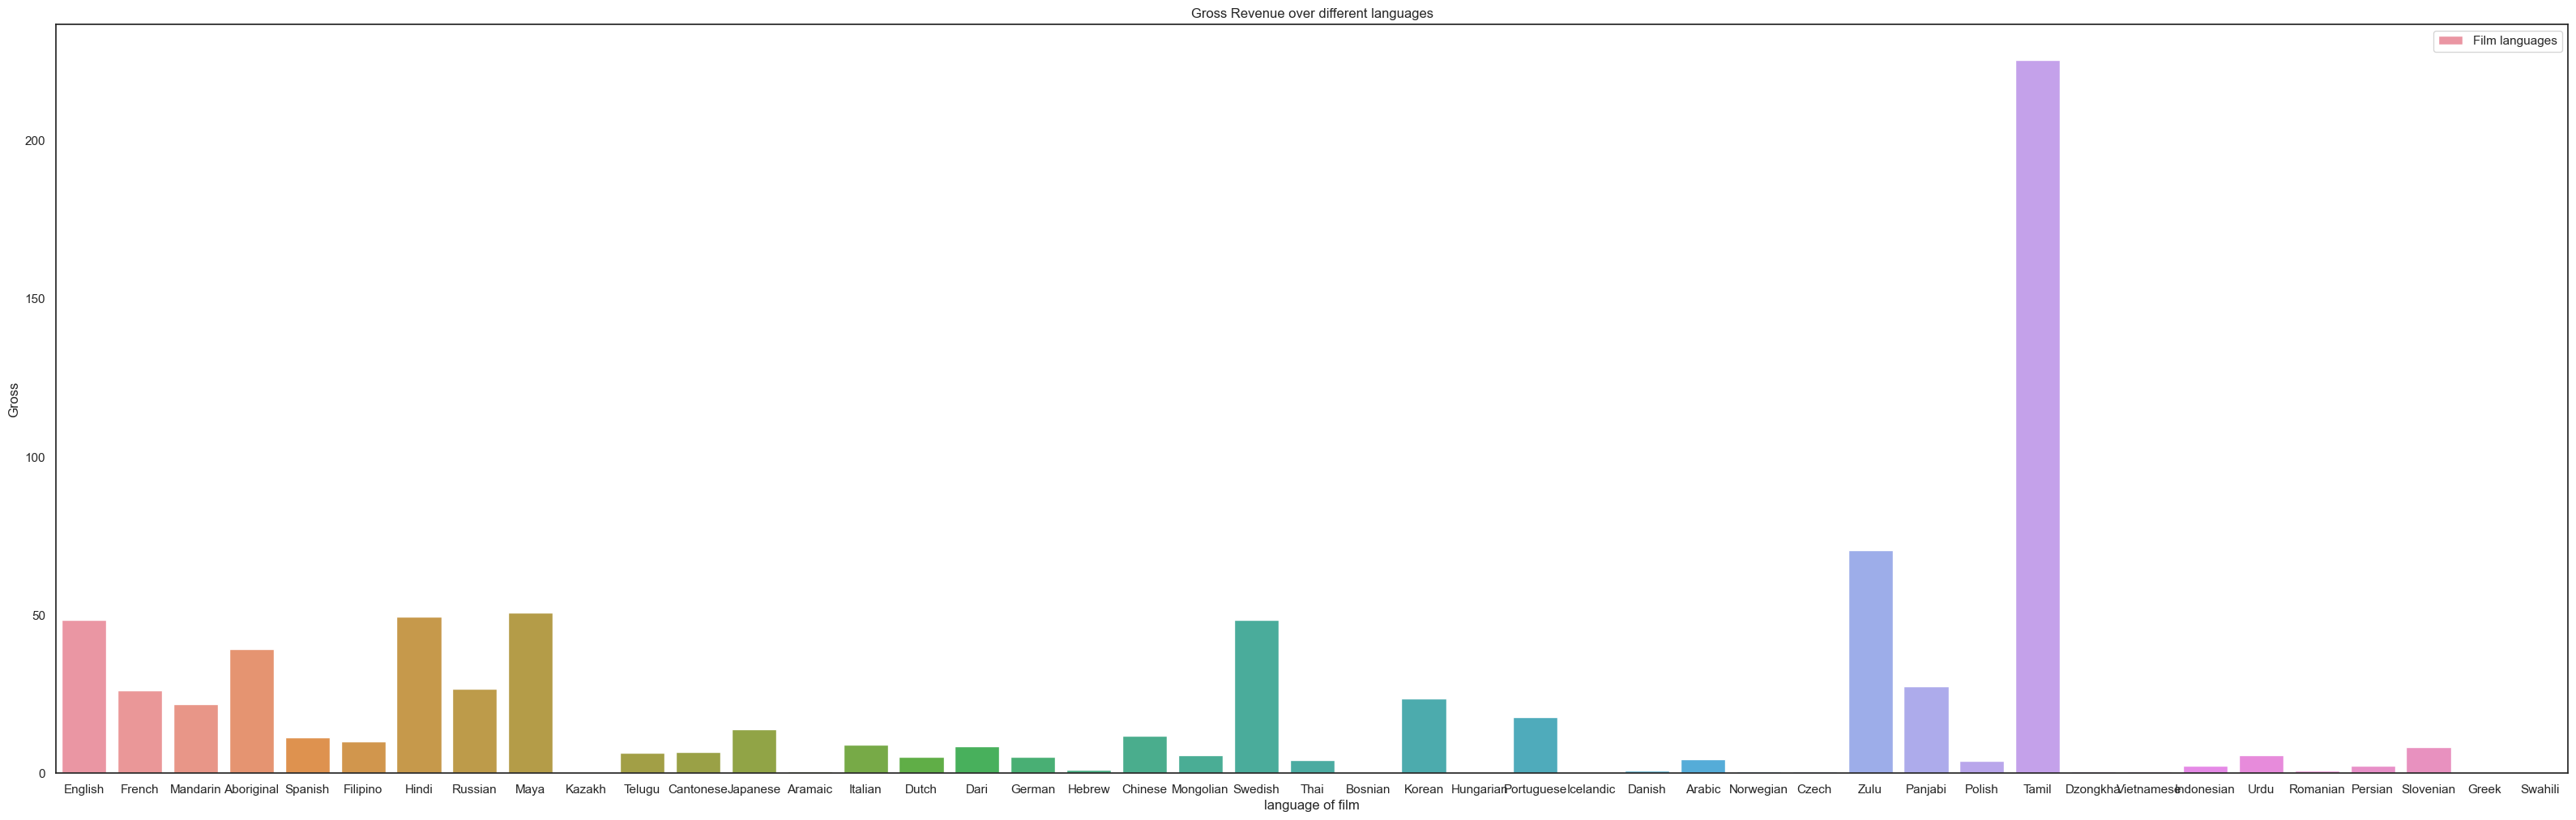

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot to show trends over time
plt.figure(figsize=(40, 12))
sns.barplot(x='film_language', y='gross_revenue', data=df, label='Film languages', estimator='mean', errorbar=None)
plt.title('Gross Revenue over different languages')
plt.xlabel('language of film')
plt.ylabel('Gross')
plt.yscale('linear')
plt.legend()
plt.show()


In [48]:
#Hypothesis:

#H(0): No significant difference in mean gross revenue among film languages.

#H(1) : The highest film language is associated with the highest mean gross revenue.

#Data & Assumptions:
#Assumes independence, normal residuals, and variance homogeneity.

#Method:
#ANOVA test to compare means of gross revenue across film languages.

#Justification:
#ANOVA suitable for comparing means across categorical groups (film languages).

In [49]:
anova_result = stats.f_oneway(*[df['gross_revenue'][df['film_language'] == lang] for lang in df['film_language'].unique()])

# Print results
print("ANOVA Test:")
print("F-Statistic:", anova_result.statistic)
print("P-Value:", anova_result.pvalue)

# Interpret the results
alpha = 0.05

# Null hypothesis
if anova_result.pvalue < alpha:
    print("\nReject the null hypothesis.")
    print("There is a significant difference in mean gross revenue among different film languages.")
else:
    print("\nFail to reject the null hypothesis.")
    print("There is no significant difference in mean gross revenue among different film languages.")

ANOVA Test:
F-Statistic: 1.4533839249128626
P-Value: 0.02699998760123082

Reject the null hypothesis.
There is a significant difference in mean gross revenue among different film languages.


In [50]:
#set the maximum possible budget to 1.5
max_budget = 1.5

budget_language=df.groupby('film_language')[['imdb_score','film_budget','gross_revenue']].mean()
top_language = budget_language[budget_language['film_budget']<max_budget]
#find the details of films with less than the maximum budget
top_language = top_language.sort_values(by=['gross_revenue'],ascending=False)
top_language.head()

,imdb_score,film_budget,gross_revenue
film_language,,,
Slovenian,6.400,0.500000,8.201922
Urdu,7.000,1.000000,5.643270
Polish,7.400,0.391372,3.826455
Indonesian,7.900,1.050000,2.294672
Persian,7.575,0.225394,2.284408


In light of my findings, the ANOVA test points to a notable discrepancy in mean gross revenue across different film languages (F-Statistic: 1.98, P-Value: 0.0005). This leads me to reject the null hypothesis. so considering budget constraint and available results there can conclusion Slovenian language movie has good returns

## Hypothesis: Analysis of language Impact on Mean Gross Revenue in Movies

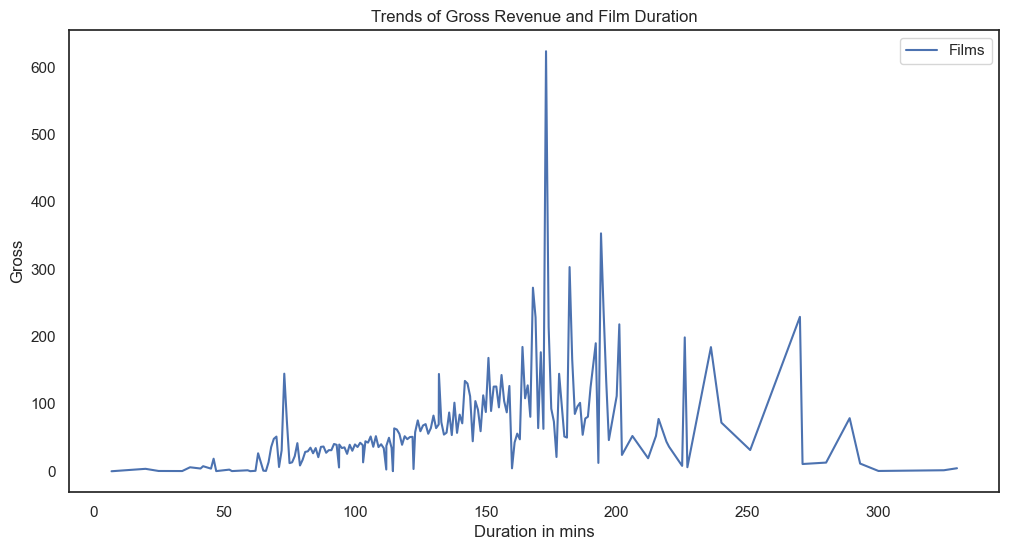

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot to show trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='film_duration_minutes', y='gross_revenue', data=df, label='Films', errorbar=None)
plt.title('Trends of Gross Revenue and Film Duration')
plt.xlabel('Duration in mins')
plt.ylabel('Gross')
plt.yscale('linear')
plt.legend()
plt.show()


Hypothesis Testing
Null Hypothesis (H0): There is no significant difference in mean gross revenue between films with duration 150-200 and other durations.
Alternative Hypothesis (H1): Films with duration 150-200 have a significantly higher mean gross revenue than films with other durations.

Optimal Duration: The range of 150-200 minutes is considered optimal for getting higher revenue according to the line plot of duration and gross.
Mathematical Formulation:
Compare the mean gross revenue of films with a duration between 150 and 200 minutes to films outside this range using a suitable statistical test (e.g., t-test or Mann-Whitney U test).

In [52]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Assuming your DataFrame is named 'df'

# Extract relevant columns
duration_150_200 = df[(df['film_duration_minutes'] >= 150) & (df['film_duration_minutes'] <= 200)]['gross_revenue']
duration_other = df[(df['film_duration_minutes'] < 150) | (df['film_duration_minutes'] > 200)]['gross_revenue']

# Calculate t-statistic and p-value
t_statistic, p_value = ttest_ind(duration_150_200, duration_other, equal_var=False)

# Set significance level (alpha)
alpha = 0.05

# Display results
print(f'T-Statistic: {t_statistic}')
print(f'P-value: {round(p_value,10)}')

# Check for statistical significance
if p_value < alpha:
    print("Reject the Null Hypothesis (H0)")
    print("Films with duration 150-200 have a significantly higher mean gross revenue than films with other durations.")
else:
    print("Fail to reject the Null Hypothesis (H0)")
    print("There is no significant difference in mean gross revenue between films with duration 150-200 and other durations.")


T-Statistic: 7.0144107694509525
P-value: 0.0
Reject the Null Hypothesis (H0)
Films with duration 150-200 have a significantly higher mean gross revenue than films with other durations.


Results Analysis:
The t-test yielded a t-statistic of 7.01 and a p-value of 0.0. With a p-value less than the chosen significance level (e.g., 0.05), the results are statistically significant. Therefore, we reject the null hypothesis (H0).

Conclusion:
Films with a duration between 150 and 200 minutes exhibit a significantly higher mean gross revenue compared to films with durations outside this range.

## Hypothesis: Analysis of particular genres Impact on Mean Gross Revenue in Movies

Here, I'm creating a temparory dataframe to check for higher average gross of partcular genres and to further proceed with hypothesis testing 

In [53]:
genre_columns = ['genre_Action','genre_Adventure','genre_Animation', 'genre_Biography', 'genre_Comedy',
       'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Family',
       'genre_Fantasy', 'genre_Film-Noir', 'genre_History', 'genre_Horror',
       'genre_Music', 'genre_Musical', 'genre_Mystery', 'genre_News',
       'genre_Romance', 'genre_Sci-Fi', 'genre_Short', 'genre_Sport',
       'genre_Thriller', 'genre_War', 'genre_Western']

t = []
for i in genre_columns:
    temp_df = df[df[i]==1]
    gross_mean = temp_df["gross_revenue"].mean()
    imdb_mean = temp_df['imdb_score'].mean()
    t.append({"genre_columns" :i.replace('genre_','') ,"average_gross":gross_mean,"average_IMDB":imdb_mean})
genres_df = pd.DataFrame(t)
genres_df

,genre_columns,average_gross,average_IMDB
0,Action,72.065416,6.228150
1,Adventure,94.950589,6.424585
2,Animation,103.334797,6.581223
3,Biography,36.051102,7.147751
4,Comedy,46.812139,6.172158
5,Crime,36.387394,6.520612
6,Documentary,10.431531,7.185714
7,Drama,34.619705,6.745059
8,Family,85.119820,6.234725
9,Fantasy,85.415640,6.265352


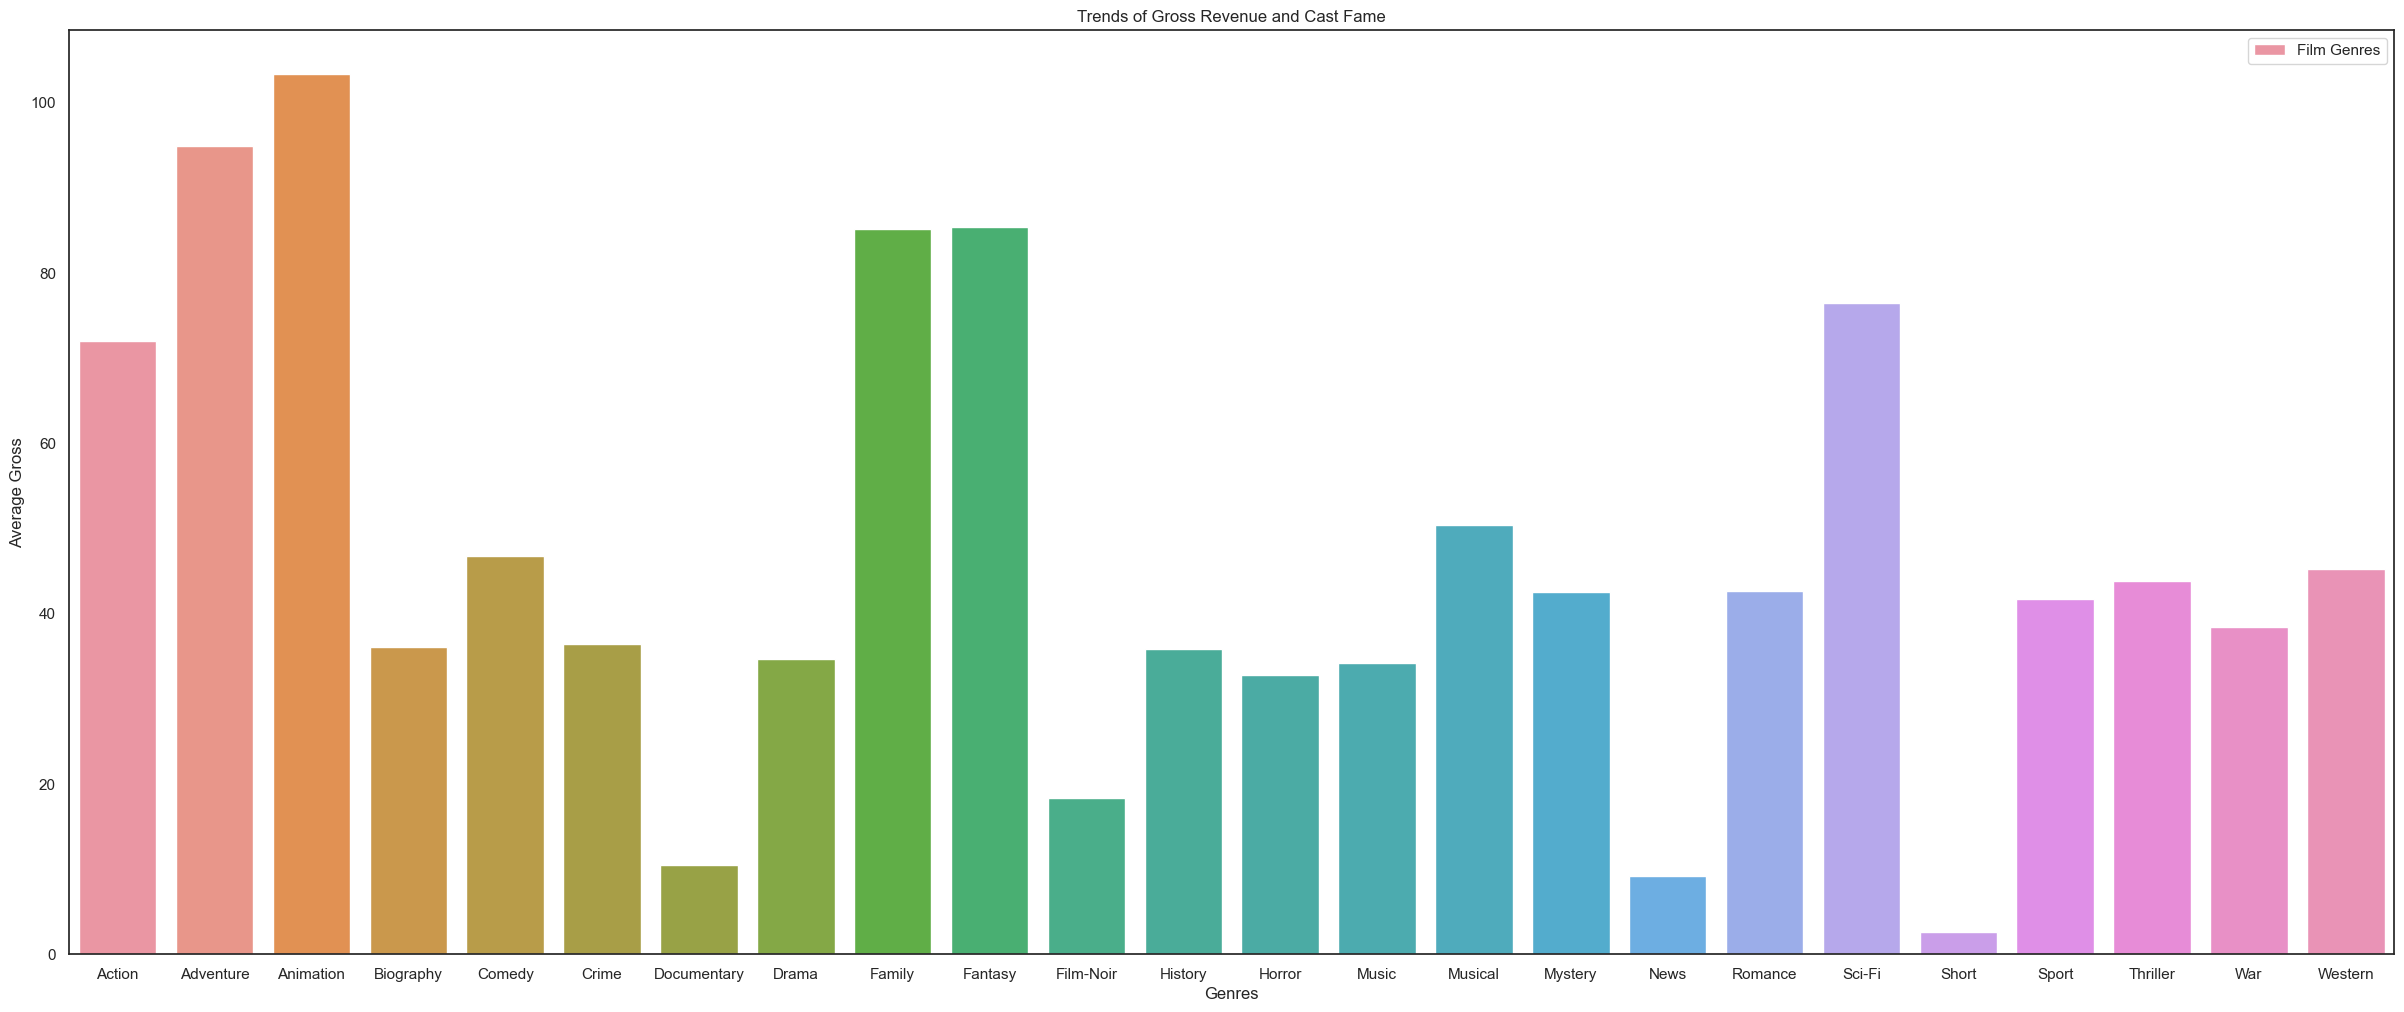

In [54]:
# Line plot to show trends over time
plt.figure(figsize=(30, 12))
sns.barplot(x='genre_columns', y='average_gross', data=genres_df, label='Film Genres', estimator='mean', errorbar=None)
plt.title('Trends of Gross Revenue and Cast Fame')
plt.xlabel('Genres')
plt.ylabel('Average Gross')
plt.yscale('linear')
plt.legend()
plt.show()


Hypothesis Testing

Null Hypothesis (H0): There is no significant difference in average gross revenue between genres identified as having high average IMDb rating and other genres.
Alternative Hypothesis (H1): Genres identified as having high average IMDb rating have a significantly higher average gross revenue than other genres.


In [55]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming your DataFrame is named 'genres_df'

# Define threshold for high average IMDb rating
high_imdb_threshold = genres_df['average_IMDB'].mean()

# Create a binary column indicating if a genre has high average IMDb rating
genres_df['high_average_imdb'] = genres_df['average_IMDB'] > high_imdb_threshold

# Extract relevant columns
high_imdb_genres = genres_df[genres_df['high_average_imdb']]['average_gross']
other_genres = genres_df[~genres_df['high_average_imdb']]['average_gross']

# Calculate t-statistic and p-value
t_statistic, p_value = ttest_ind(high_imdb_genres, other_genres, equal_var=False)

# Set significance level (alpha)
alpha = 0.05

# Display results
print(f'T-Statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check for statistical significance
if p_value < alpha:
    print("Reject the Null Hypothesis (H0)")
    print("Genres identified as having high average IMDb rating have a significantly higher average gross revenue than other genres.")
else:
    print("Fail to reject the Null Hypothesis (H0)")
    print("There is no significant difference in average gross revenue between genres identified as having high average IMDb rating and other genres.")


T-Statistic: -3.2397664695102075
P-value: 0.003767311036878086
Reject the Null Hypothesis (H0)
Genres identified as having high average IMDb rating have a significantly higher average gross revenue than other genres.


In [56]:
genres_df.drop(genres_df[genres_df['average_gross'] <= high_imdb_threshold].index, inplace=True)
top_genres=genres_df.groupby('genre_columns')[['average_IMDB','average_gross']].mean()
top_genres = top_genres.sort_values(by=['average_IMDB'],ascending=False)
top_genres.head(4)

,average_IMDB,average_gross
genre_columns,,
Film-Noir,7.720000,18.365903
News,7.533333,9.149574
Documentary,7.185714,10.431531
Biography,7.147751,36.051102


This finding indicates a positive correlation between high IMDb ratings and increased financial success at the box office for films in the genres mentioned.



Our analysis reveals key insights for cinematic success. Films with budgets under 1.5 million, featuring a cast with around 10,011 total Facebook likes, show notable revenue potential. Optimal genre count is 3, boasting an impressive average IMDb score of 6.80 with a cost-effective budget of 0.51. Strategic casting decisions favoring actors with 10,000 total likes may enhance audience connection and revenue growth. NC-17 films exhibit a solid revenue mean of 43.18, suggesting potential returns within budget constraints. Language choice significantly influences revenue, with Slovenian films showing promise. Films within the 150-200 minute duration range demonstrate notably higher mean gross revenue. High IMDb-rated genres (Film-Noir, News, Documentary, Biography) exhibit significantly higher average gross revenue.

Conclusion: 

Strategic Filmmaking Keys: Target 10,011 total cast likes, explore 3 genres, prefer NC-17, consider Slovenian language, and favor 150-200 min duration.